In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import xarray as xr

pkl_fname = 'SRB_site_soil_miosture_data.pkl'

output_file = 'SRB_site_soil_moisture_data_daily.nc'

with open(pkl_fname, 'rb') as handle:
    sm_data = pickle.load(handle)
    
print(sm_data['station_id'][0])
print(sm_data['station_data'][0])


306
     network  stationID    Year  Month   Day    Doy  sm_5cm  sm_20cm  sm_50cm  \
0     snotel      306.0  2000.0    1.0   1.0    1.0     NaN    0.037    0.020   
1     snotel      306.0  2000.0    1.0   2.0    2.0     NaN    0.037    0.020   
2     snotel      306.0  2000.0    1.0   3.0    3.0     NaN    0.038    0.020   
3     snotel      306.0  2000.0    1.0   4.0    4.0     NaN    0.038    0.020   
4     snotel      306.0  2000.0    1.0   5.0    5.0     NaN    0.038    0.018   
...      ...        ...     ...    ...   ...    ...     ...      ...      ...   
6764  snotel      306.0  2019.0    5.0  18.0  138.0   0.147    0.131    0.063   
6765  snotel      306.0  2019.0    5.0  19.0  139.0   0.164    0.127    0.063   
6766  snotel      306.0  2019.0    5.0  20.0  140.0   0.165    0.125    0.062   
6767  snotel      306.0  2019.0    5.0  21.0  141.0   0.176    0.126    0.064   
6768  snotel      306.0  2019.0    5.0  22.0  142.0   0.168    0.126    0.063   

         Lat    Lon\r  

In [2]:
nStation = len(sm_data['station_id'])
print('nStation = '+str(nStation))

nStation = 58


In [3]:
df_station = pd.DataFrame()

year_start = np.zeros((nStation,))
year_end   = np.zeros((nStation,))

month_start = np.zeros((nStation,))
month_end   = np.zeros((nStation,))

day_start = np.zeros((nStation,))
day_end   = np.zeros((nStation,))

station_id  = np.zeros((nStation,))
station_lat = np.zeros((nStation,))
station_lon = np.zeros((nStation,))

for i in np.arange(nStation):
    year_start[i] = sm_data['station_data'][i].iloc[0,2]
    year_end[i]   = sm_data['station_data'][i].iloc[-1,2]

    month_start[i] = sm_data['station_data'][i].iloc[0,3]
    month_end[i]   = sm_data['station_data'][i].iloc[-1,3]

    day_start[i] = sm_data['station_data'][i].iloc[0,4]
    day_end[i]   = sm_data['station_data'][i].iloc[-1,4]

    station_id[i]  = sm_data['station_data'][i].iloc[0,1]
    if((station_id[i]==674) or (station_id[i]==2148) or (station_id[i]==2198)):
        station_lat[i] = sm_data['station_data'][i].iloc[0,11]
        station_lon[i] = sm_data['station_data'][i].iloc[0,12]
    else:
        station_lat[i] = sm_data['station_data'][i].iloc[0,9]
        station_lon[i] = sm_data['station_data'][i].iloc[0,10]
        
    year_sta  = sm_data['station_data'][i].iloc[:,2]
    month_sta = sm_data['station_data'][i].iloc[:,3]
    day_sta   = sm_data['station_data'][i].iloc[:,4]
    
    # Create datetime vector
    df_dates_sta = pd.DataFrame({'year': year_sta,
                                 'month': month_sta,
                                 'day': day_sta})
    
    # Add datetime vector to dataset
    sm_data['station_data'][i]['DateTime'] = pd.to_datetime(df_dates_sta)
    
df_start = pd.DataFrame({'year': year_start,
                         'month': month_start,
                         'day': day_start})

df_end = pd.DataFrame({'year': year_end,
                         'month': month_end,
                         'day': day_end})

# Convert station IDs and clean them up
station_ids = np.array2string(station_id,separator=',')
station_ids = station_ids.replace('.','')
station_ids = station_ids.replace('\n','')
station_ids = station_ids.replace('[','')
station_ids = station_ids.replace(']','')
station_ids = station_ids.replace(' ','')
station_ids = station_ids.split(',')

df_station['station_id'] = station_ids
df_station['latitude'] = station_lat
df_station['longitude'] = station_lon
df_station['start_date'] = pd.to_datetime(df_start)
df_station['end_date'] = pd.to_datetime(df_end)
df_station['record_length'] = df_station['end_date'] - df_station['start_date']
df_station

,station_id,latitude,longitude,start_date,end_date,record_length
0,306,43.757,-115.239,2000-01-01,2019-05-22,7081 days
1,312,44.303,-115.234,2007-06-21,2019-05-22,4353 days
2,321,41.834,-115.452,2011-09-01,2019-05-22,2820 days
3,336,41.762,-115.693,2005-08-09,2019-05-22,5034 days
4,361,44.830,-118.188,2007-07-31,2019-05-22,4313 days
5,424,44.437,-111.994,2007-09-21,2019-05-22,4261 days
6,425,46.563,-115.288,2011-08-23,2018-09-26,2591 days
7,460,43.131,-110.202,2011-07-16,2019-05-22,2867 days
8,476,41.821,-116.102,2005-08-09,2019-05-22,5034 days
9,490,43.875,-114.714,2010-07-28,2019-05-22,3220 days


In [4]:
df_station['start_date'].min()

Timestamp('2000-01-01 00:00:00')

In [5]:
df_station['end_date'].max()

Timestamp('2019-05-22 00:00:00')

In [6]:
nDays = (df_station['end_date'].max() - df_station['start_date'].min()).days + 1
nDays

7082

In [7]:
# Create vector of times from 

sm_dates = pd.date_range(start=df_station['start_date'].min(),
                         end=df_station['end_date'].max())

sm_5cm  = np.nan*np.ones((nDays,nStation))
sm_20cm = np.nan*np.ones((nDays,nStation))
sm_50cm = np.nan*np.ones((nDays,nStation))

sm_5cm_flag  = np.nan*np.ones((nDays,nStation))
sm_20cm_flag = np.nan*np.ones((nDays,nStation))
sm_50cm_flag = np.nan*np.ones((nDays,nStation))

sm_10cm  = np.nan*np.ones((nDays,3))
sm_100cm = np.nan*np.ones((nDays,3))

sm_10cm_flag  = np.nan*np.ones((nDays,3))
sm_100cm_flag = np.nan*np.ones((nDays,3))

sm_dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20',
               '2019-05-21', '2019-05-22'],
              dtype='datetime64[ns]', length=7082, freq='D')

In [8]:
scan_counter = 0;

for i in np.arange(nStation):
    
    date_start = df_station['start_date'][i]
    date_end   = df_station['end_date'][i]
    
    # Compute the number of records we expect if it is continuous
    nExpect = (date_end - date_start).days + 1
    
    # SCAN sites
    if((df_station['station_id'][i]==674) or (df_station['station_id'][i]==2148) or (df_station['station_id'][i]==2198)):
        sm_5cm_sta   = sm_data['station_data'][i].iloc[:,6] 
        sm_10cm_sta  = sm_data['station_data'][i].iloc[:,7]
        sm_20cm_sta  = sm_data['station_data'][i].iloc[:,8]
        sm_50cm_sta  = sm_data['station_data'][i].iloc[:,9]
        sm_100cm_sta = sm_data['station_data'][i].iloc[:,10]

        sm_5cm_sta_flag   = sm_data['station_data'][i].iloc[:,13] 
        sm_10cm_sta_flag  = sm_data['station_data'][i].iloc[:,14]
        sm_20cm_sta_flag  = sm_data['station_data'][i].iloc[:,15]
        sm_50cm_sta_flag  = sm_data['station_data'][i].iloc[:,16]
        sm_100cm_sta_flag = sm_data['station_data'][i].iloc[:,17]

    else: # SNOTEL sites
        sm_5cm_sta  = sm_data['station_data'][i].iloc[:,6]
        sm_20cm_sta = sm_data['station_data'][i].iloc[:,7]
        sm_50cm_sta = sm_data['station_data'][i].iloc[:,8]

        sm_5cm_sta_flag  = sm_data['station_data'][i].iloc[:,11]
        sm_20cm_sta_flag = sm_data['station_data'][i].iloc[:,12]
        sm_50cm_sta_flag = sm_data['station_data'][i].iloc[:,13]


    if(nExpect != sm_5cm_sta.size):
        print('Mismatch in expected and actual record length for station '+str(df_station['station_id'][i]))
    
    else:
        print('Record length matches expected')

    for j in np.arange(sm_5cm_sta.size):

        ind = np.where(sm_dates == sm_data['station_data'][i]['DateTime'][j])[0][0]

        sm_5cm[ind,i]  = sm_5cm_sta[j]
        sm_20cm[ind,i] = sm_20cm_sta[j]
        sm_50cm[ind,i] = sm_50cm_sta[j]

        sm_5cm_flag[ind,i]  = sm_5cm_sta_flag[j]
        sm_20cm_flag[ind,i] = sm_20cm_sta_flag[j]
        sm_50cm_flag[ind,i] = sm_50cm_sta_flag[j]

        if((df_station['station_id'][i]==674) or (df_station['station_id'][i]==2148) or (df_station['station_id'][i]==2198)):

            sm_10cm[ind,scan_counter]  = sm_10cm_sta[j]
            sm_100cm[ind,scan_counter] = sm_100cm_sta[j]

            sm_10cm_flag[ind,scan_counter]  = sm_10cm_sta_flag[j]
            sm_100cm_flag[ind,scan_counter] = sm_100cm_sta_flag[j]

            if(j==(sm_5cm_sta.size-1)):
                scan_counter += 1

Mismatch in expected and actual record length for station 306
Mismatch in expected and actual record length for station 312
Record length matches expected
Mismatch in expected and actual record length for station 336
Mismatch in expected and actual record length for station 361
Mismatch in expected and actual record length for station 424
Record length matches expected
Record length matches expected
Mismatch in expected and actual record length for station 476
Record length matches expected
Record length matches expected
Mismatch in expected and actual record length for station 523
Mismatch in expected and actual record length for station 524
Mismatch in expected and actual record length for station 537
Mismatch in expected and actual record length for station 548
Mismatch in expected and actual record length for station 550
Mismatch in expected and actual record length for station 573
Mismatch in expected and actual record length for station 577
Mismatch in expected and actual record 

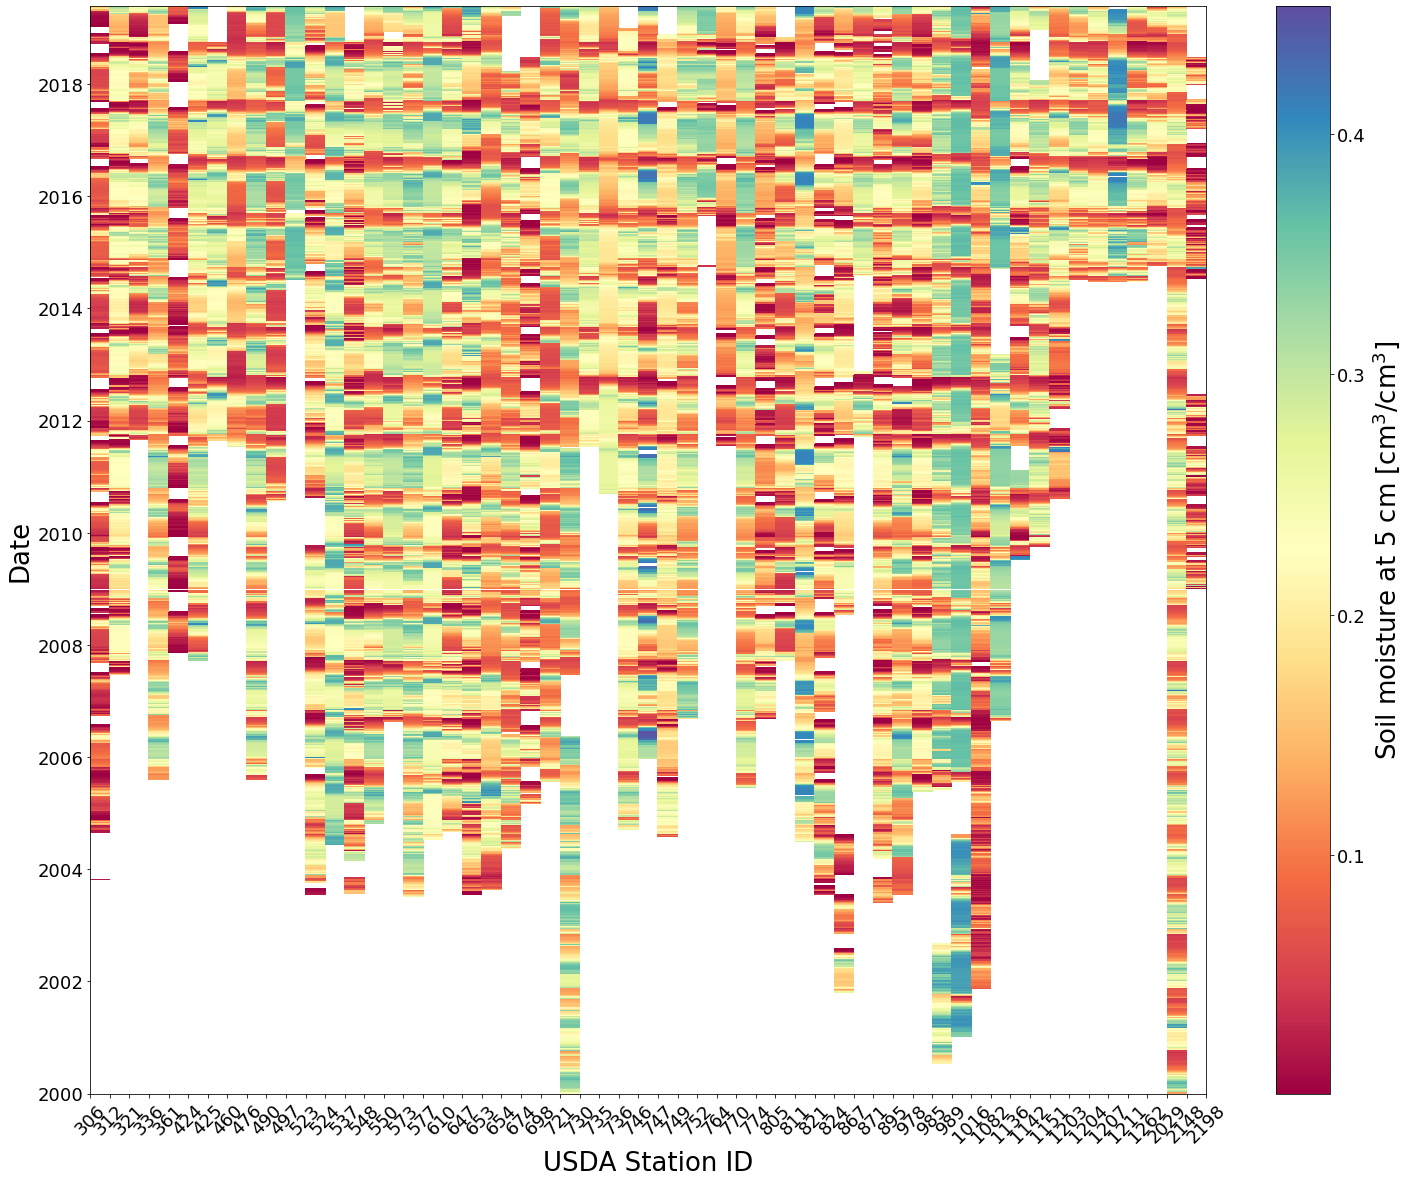

In [9]:
dd,ss = np.meshgrid(np.arange(nStation),sm_dates)

# station_ids = np.array2string(df_station['station_id'].values,separator=',')
# station_ids = station_ids.replace('.','')
# station_ids = station_ids.replace('\n','')
# station_ids = station_ids.replace('[','')
# station_ids = station_ids.replace(']','')
# station_ids = station_ids.replace(' ','')
# station_ids = station_ids.split(',')
station_ids = df_station['station_id'].astype(str)

plt.figure(figsize=(25,20))
plt.rcParams.update({'font.size': 18})
plt.pcolormesh(dd,ss,sm_5cm,cmap='Spectral')
plt.xticks(np.arange(nStation),station_ids.replace('.0',''),rotation=45)
plt.xlabel('USDA Station ID',fontsize=26)
plt.ylabel('Date',fontsize=26)
cb = plt.colorbar()
cb.set_label(label='Soil moisture at 5 cm [cm${}^3$/cm${}^3$]',fontsize=26)
plt.savefig('SoilMoisture5CM_SRB.png',dpi=150,bbox_inches='tight')
plt.show()

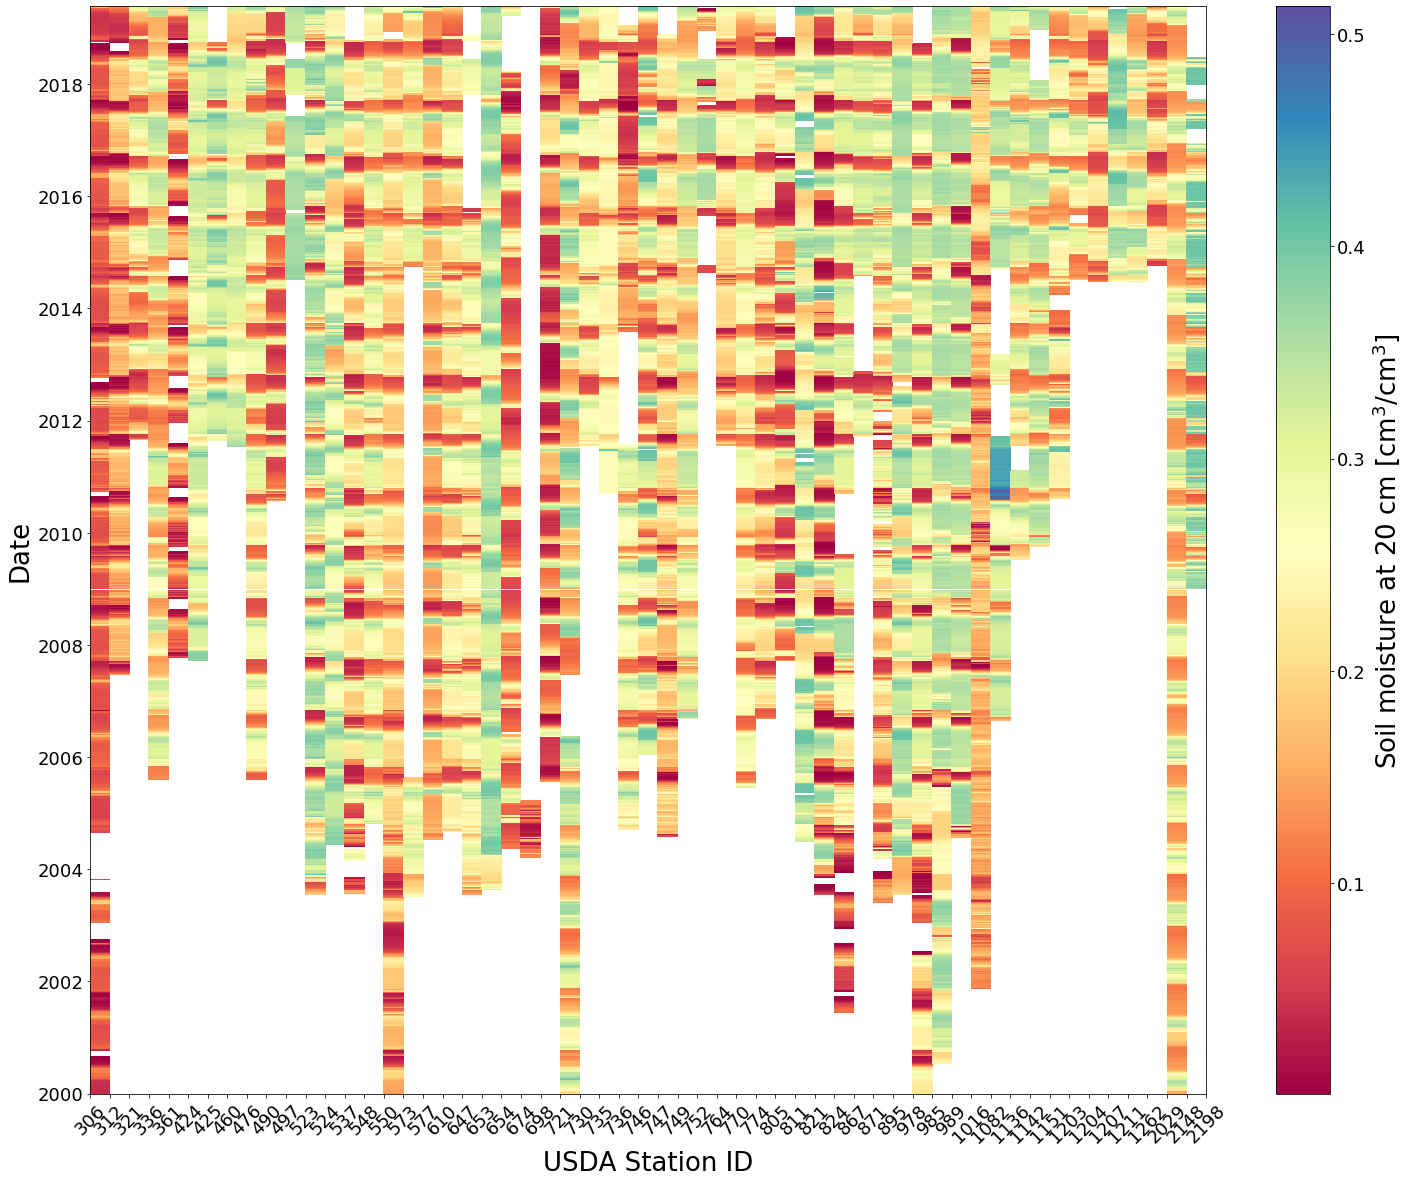

In [10]:
plt.figure(figsize=(25,20))
plt.rcParams.update({'font.size': 18})
plt.pcolormesh(dd,ss,sm_20cm,cmap='Spectral')
plt.xticks(np.arange(nStation),station_ids.replace('.0',''),rotation=45)
plt.xlabel('USDA Station ID',fontsize=26)
plt.ylabel('Date',fontsize=26)
cb = plt.colorbar()
cb.set_label(label='Soil moisture at 20 cm [cm${}^3$/cm${}^3$]',fontsize=26)
plt.savefig('SoilMoisture20CM_SRB.png',dpi=150,bbox_inches='tight')
plt.show()

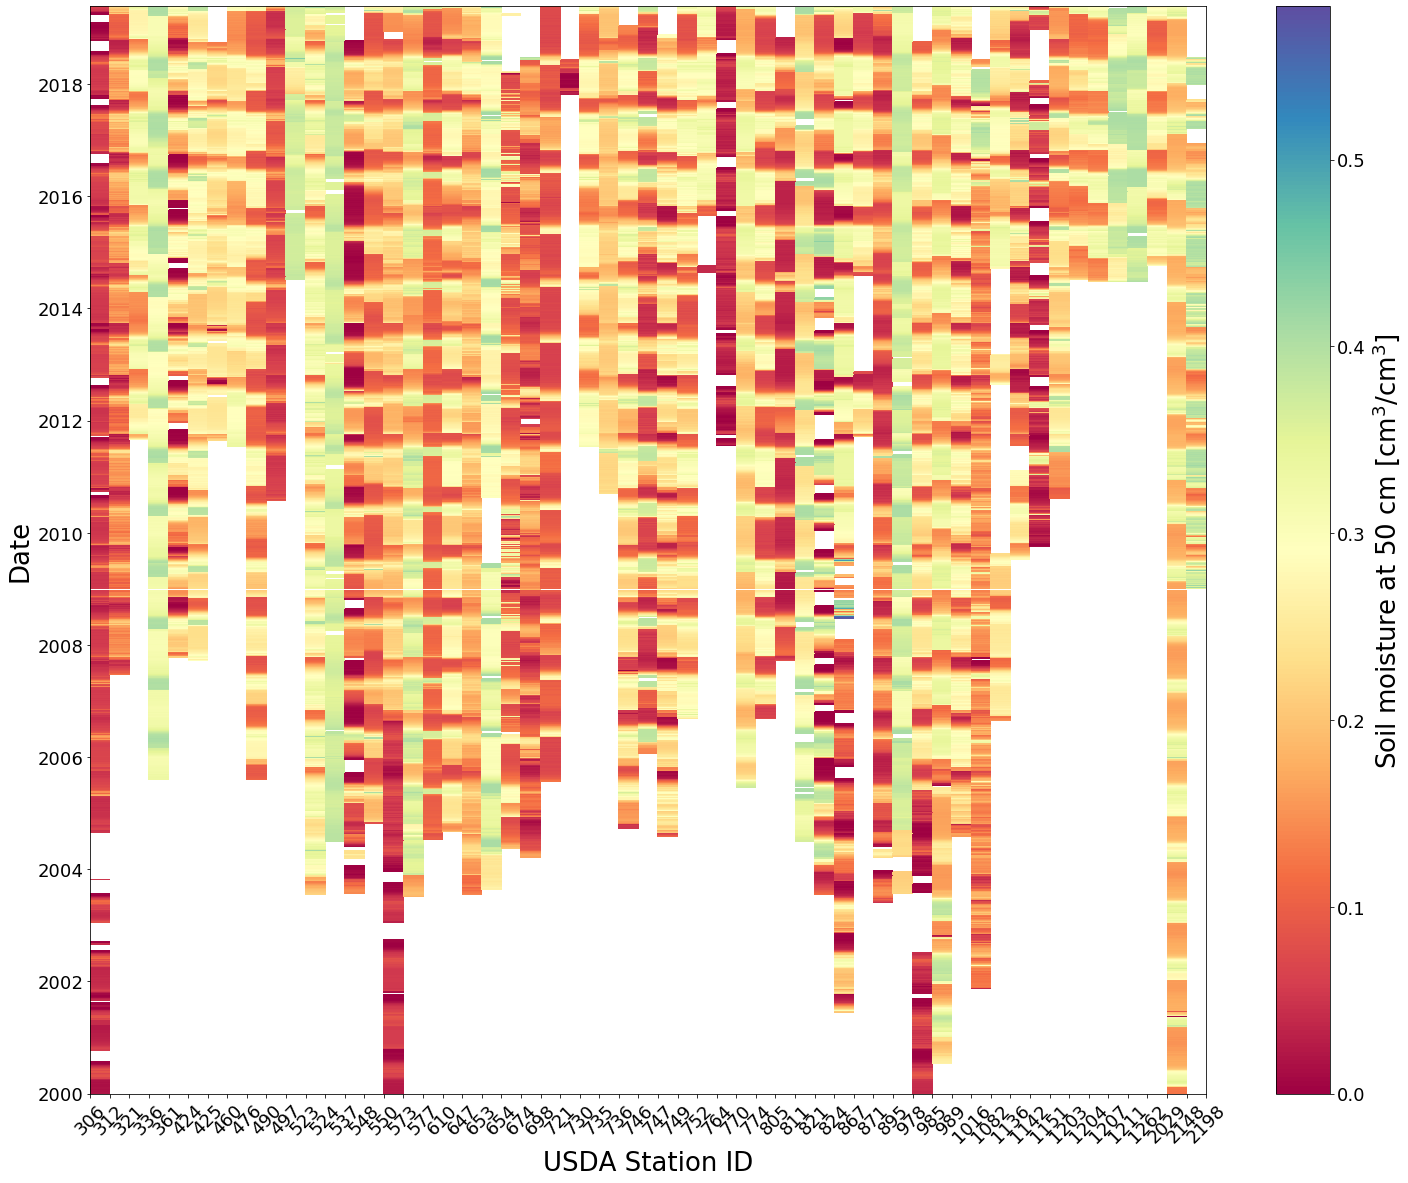

In [11]:
plt.figure(figsize=(25,20))
plt.rcParams.update({'font.size': 18})
plt.pcolormesh(dd,ss,sm_50cm,cmap='Spectral')
plt.xticks(np.arange(nStation),station_ids.replace('.0',''),rotation=45)
plt.xlabel('USDA Station ID',fontsize=26)
plt.ylabel('Date',fontsize=26)
cb = plt.colorbar()
cb.set_label(label='Soil moisture at 50 cm [cm${}^3$/cm${}^3$]',fontsize=26)
plt.savefig('SoilMoisture50CM_SRB.png',dpi=150,bbox_inches='tight')
plt.show()

In [12]:
SCAN_station_ids = ['674','2148','2198']

ds_out = xr.Dataset(
    data_vars=dict(
        sm_5cm=(['time','stationID'],sm_5cm),
        sm_20cm=(['time','stationID'],sm_20cm),
        sm_50cm=(['time','stationID'],sm_50cm),
        sm_5cm_flag=(['time','stationID'],sm_5cm_flag),
        sm_20cm_flag=(['time','stationID'],sm_20cm_flag),
        sm_50cm_flag=(['time','stationID'],sm_50cm_flag),
        # Additional depths available at SCAN sites
        sm_10cm=(['time','scan_stationID'],sm_10cm),
        sm_100cm=(['time','scan_stationID'],sm_100cm),
        sm_10cm_flag=(['time','scan_stationID'],sm_10cm_flag),
        sm_100cm_flag=(['time','scan_stationID'],sm_100cm_flag),        
    ),
    coords=dict(
        stationID=(['stationID'],station_ids),
        scan_stationID=(['scan_stationID'],SCAN_station_ids),
        time=sm_dates,
    ),
    attrs=dict(description='Snake River Basin Soil Moisture Observations'),
)

ds_out.to_netcdf(output_file)

ds_out

<xarray.Dataset>
Dimensions:         (scan_stationID: 3, stationID: 58, time: 7082)
Coordinates:
  * stationID       (stationID) object '306' '312' '321' ... '2148' '2198'
  * scan_stationID  (scan_stationID) <U4 '674' '2148' '2198'
  * time            (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2019-05-22
Data variables:
    sm_5cm          (time, stationID) float64 nan nan nan ... 0.288 nan 0.216
    sm_20cm         (time, stationID) float64 0.037 nan nan ... 0.345 nan 0.252
    sm_50cm         (time, stationID) float64 0.02 nan nan ... 0.353 nan 0.339
    sm_5cm_flag     (time, stationID) float64 1.0 nan nan nan ... 0.0 nan 46.78
    sm_20cm_flag    (time, stationID) float64 0.0 nan nan nan ... 0.0 nan -117.1
    sm_50cm_flag    (time, stationID) float64 0.0 nan nan nan ... 0.0 nan 0.0
    sm_10cm         (time, scan_stationID) float64 nan nan nan ... nan nan nan
    sm_100cm        (time, scan_stationID) float64 nan nan nan ... nan nan nan
    sm_10cm_flag    (time, scan_stationID) float64 nan nan nan ... nan nan nan
    sm_100cm_flag   (time, scan_stationID) float64 nan nan nan ... nan nan nan
Attributes:
    description:  Snake River Basin Soil Moisture Observations